Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

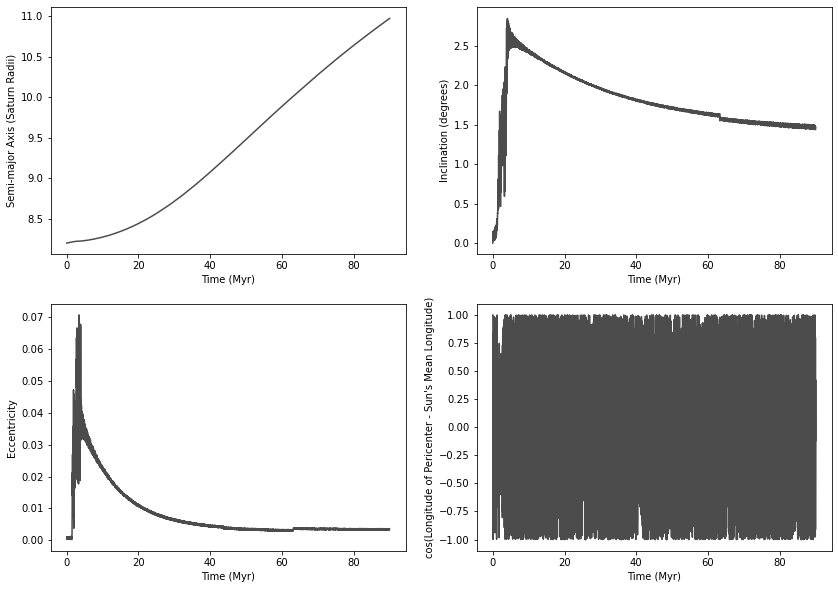

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# read arguments, and open corresponding output file
version = 4.3 # version 3 for migration force, 4 for tidal forces, 5 for eccentricity oscillations
numSamples = 4500
simTime = 90.
ia = 8.2

fa = 12.9

step = 1
col = '#4c4c4c'


buffer = 4


version_int = int(version)

if version == 3:
    f = open(r"v3out-div1.0-"+str(numSamples)+"s-"+str(ia)+"to"+str(fa)+"rs.txt", "r")
else:
    if version == 4.1:
        f = open(r"v4.1-t-"+str(ia)+"rs-"+str(numSamples)+"s-"+str(simTime)+"myrs.txt", "r")
    else:
        f = open(r"v"+str(version)+"-"+str(ia)+"rs-"+str(numSamples)+"s-"+str(simTime)+"myrs.txt", "r")


plotSamples = numSamples // step

# prep 5 arrays
a_array = [0] * plotSamples
e_array = [0] * plotSamples
i_array = [0] * plotSamples
t_array = [0] * plotSamples
diff_array = [0] * plotSamples

if version_int == 5:
    eSat_array = [0] * plotSamples

# read file
allLines = f.readlines()
f.close()
if (version_int == 3):
    incl_index = 4
    pomega_index = 2
    m_long_index = 3
    a_index = 0
    e_index = 1
    t_index = 5
    
if version_int == 4:
    incl_index = 2
    pomega_index = 3
    m_long_index = 4
    a_index = 0
    e_index = 1
    t_index = 5
    
if version_int == 5:
    a_index = 0
    e_index = 1
    incl_index = 2
    pomega_index = 3
    m_long_index = 4
    eSat_index = 5
    t_index = 6
    
for i in range(buffer, buffer + numSamples, step):
    numbers = allLines[i].split()
    a_array[(i - buffer) // step] = float(numbers[a_index])
    e_array[(i - buffer) // step] = float(numbers[e_index])
    i_array[(i - buffer) // step] = float(numbers[incl_index])*180./np.pi
    t_array[(i - buffer) // step] = float(numbers[t_index]) / 1000000.
    diff_array[(i - buffer) // step] = np.cos(float(numbers[pomega_index]) - float(numbers[m_long_index]))
    
    if version_int == 5:
        eSat_array[(i - buffer) // step] = float(numbers[eSat_index])

fig, axs = plt.subplots(2, 2)

fig.set_size_inches(14, 10)

axs[0][0].plot(t_array,a_array, color=col)
axs[0][0].set_xlabel('Time (Myr)')
axs[0][0].set_ylabel('Semi-major Axis (Saturn Radii)')

axs[1][0].plot(t_array,e_array, color=col)
axs[1][0].set_xlabel('Time (Myr)')
axs[1][0].set_ylabel('Eccentricity')

axs[0][1].plot(t_array,i_array, color=col)
axs[0][1].set_xlabel('Time (Myr)')
axs[0][1].set_ylabel('Inclination (degrees)')

axs[1][1].plot(t_array,diff_array, color=col)
axs[1][1].set_xlabel('Time (Myr)')
axs[1][1].set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')

In [13]:
if version_int == 5:
    fig, axs = plt.subplots(1)
    axs.plot(t_array,eSat_array, color=col)
    axs.set_xlabel('Time (Myr)')
    axs.set_ylabel('Saturn\'s Eccentricity')

Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

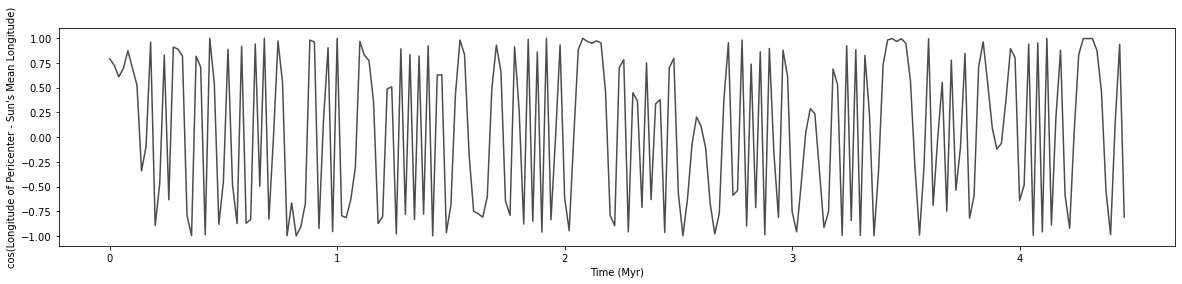

In [14]:
# plot zoom on cos(pomega-l)

start_ratio = 1./30.
end_ratio = 2.5/30.

plotSamplesZ = int(plotSamples * (end_ratio - start_ratio))

start_i = int(start_ratio * plotSamples)
end_i = start_i + plotSamplesZ

diff_Z = [0] * plotSamplesZ
t_Z = [0] * plotSamplesZ

for i in range(start_i, end_i):
    diff_Z[i - start_i] = diff_array[i]
    t_Z[i-start_i] = t_array[i]-t_array[start_i]
    
fig, axs = plt.subplots(1)

fig.set_size_inches(20, 4)

axs.plot(t_Z, diff_Z, color=col)
axs.set_xlabel('Time (Myr)')
axs.set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')


Text(0, 0.5, "cos(Longitude of Pericenter - Sun's Mean Longitude)")

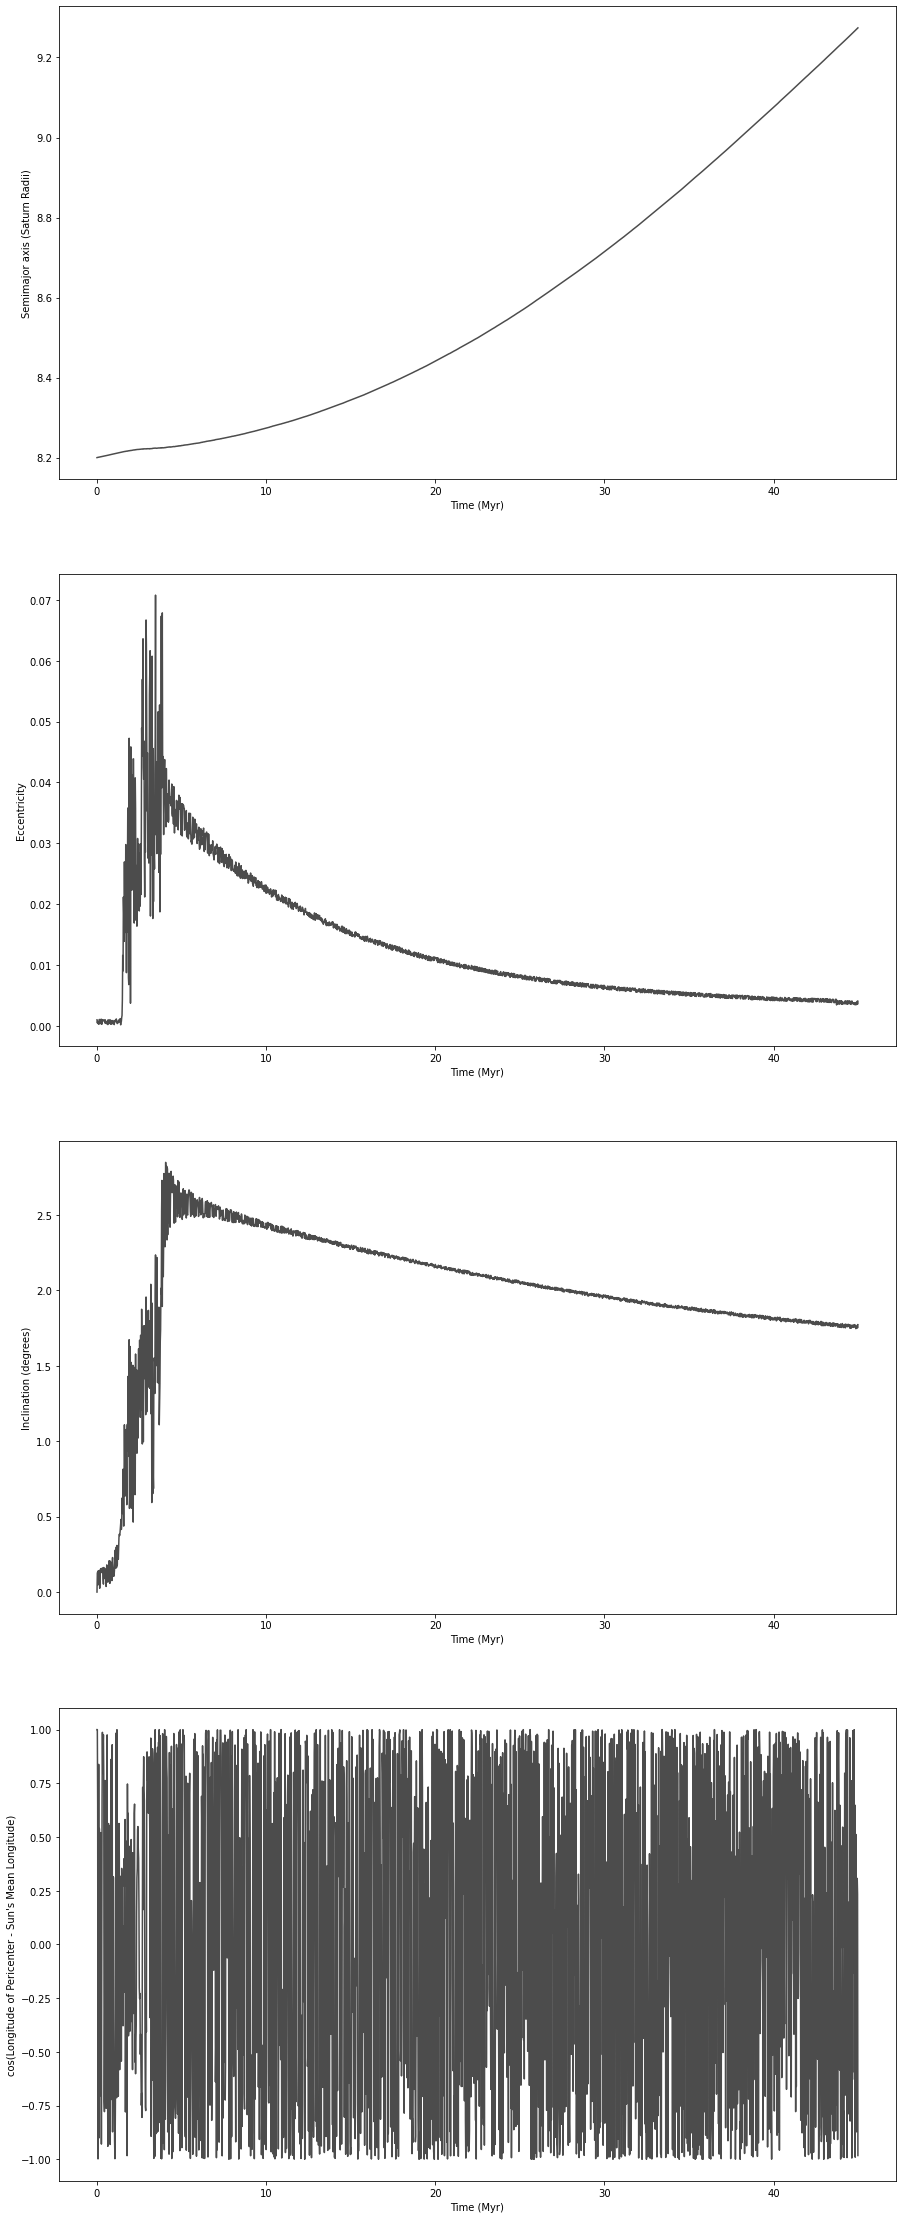

In [15]:
# plot zoom

start_ratio = 0.
end_ratio = 0.5

plotSamplesZ = int(plotSamples * (end_ratio - start_ratio))

start_i = int(start_ratio * plotSamples)
end_i = start_i + plotSamplesZ

# prep 3 arrays
a_arrayZ = [0] * plotSamplesZ
e_arrayZ = [0] * plotSamplesZ
i_arrayZ = [0] * plotSamplesZ
t_arrayZ = [0] * plotSamplesZ
diff_arrayZ = [0] * plotSamplesZ

for i in range(start_i, end_i):
    a_arrayZ[i - start_i] = a_array[i]
    e_arrayZ[i - start_i] = e_array[i]
    i_arrayZ[i - start_i] = i_array[i]
    diff_arrayZ[i - start_i] = diff_array[i]
    t_arrayZ[i - start_i] = t_array[i]

figZ, axsZ = plt.subplots(4)

figZ.set_size_inches(15, 40)

axsZ[0].plot(t_arrayZ,a_arrayZ,color=col)
axsZ[0].set_xlabel('Time (Myr)')
axsZ[0].set_ylabel('Semimajor axis (Saturn Radii)')

axsZ[1].plot(t_arrayZ,e_arrayZ,color=col)
axsZ[1].set_xlabel('Time (Myr)')
axsZ[1].set_ylabel('Eccentricity')

axsZ[2].plot(t_arrayZ,i_arrayZ,color=col)
axsZ[2].set_xlabel('Time (Myr)')
axsZ[2].set_ylabel('Inclination (degrees)')

axsZ[3].plot(t_arrayZ,diff_arrayZ,color=col)
axsZ[3].set_xlabel('Time (Myr)')
axsZ[3].set_ylabel('cos(Longitude of Pericenter - Sun\'s Mean Longitude)')

Text(0, 0.5, 'Eccentricity Damping Timescale (Myr)')

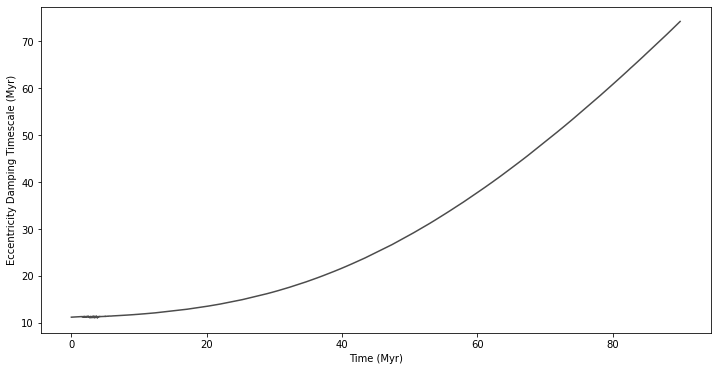

In [16]:
# Plot eccentricity decay timescale over time
G = 6.67e-11 # G in SI units ****
mSun = 1.9891e30 # mass of sun in kg ****
AU_TO_M = 1.496e+11 # meters in one AU
YR_TO_SEC = 3600*24*365.25 # seconds in a year

mSat = 0.0002857 # mass of saturn in solar masses
rSat = 0.00038926024 # radius of Saturn in AU
mTitan = 0.0000000676319759 # mass of titan in solar masses
rTitan = 0.04421567543 # radius of Titan in Saturn radii
ks = 0.15 # Titan's tidal Love number
Q = 100. # tidal Q factor for Titan (estimated)

q = mSat/mTitan

const = -27.*ks*q*(1+q)*rTitan**8

tau_e_array = [0] * plotSamples

GMTitan = G*mTitan*mSun
GMSat = G*mSat*mSun

T_per_nm = (2*Q*(rTitan*rSat*AU_TO_M)**3)/(GMTitan)

for i in range(plotSamples):
    e = e_array[i]
    a = a_array[i]
    
    # calculate f2, f3, f4, f5
    f2 = 1 + (15./2.)*(e**2) + (45./8.)*(e**4) + (5./16.)*(e**6)
    f3 = 1 + (15./4.)*(e**2) + (15./8.)*(e**4) + (5./64.)*(e**6)
    f4 = 1 + (3./2.)*(e**2) + (1./8.)*(e**4)
    f5 = 1 + (3.)*(e**2) + (3./8.)*(e**4)
    
    nmTitan = np.sqrt(GMSat/((a*rSat*AU_TO_M)**3)) # mean motion of Titan
    spinTitan_per_nm = f2 / (f5*(1-e**2)**(3./2.))
    T = T_per_nm*nmTitan
    
    e_dot = (const/(T*a**8))*(e/((1-e**2)**(13./2.)))*(f3-((11./18.)*(1-e**2)**(3./2.)*f4*spinTitan_per_nm))
    
    tau_e_array[i] = -(e/e_dot)/YR_TO_SEC/1000000.
    
    
fig2, axes = plt.subplots(1)

fig2.set_size_inches(12, 6)

axes.plot(t_array,tau_e_array,color=col)
axes.set_xlabel('Time (Myr)')
axes.set_ylabel('Eccentricity Damping Timescale (Myr)')


In [17]:
# inclination damping calculations (Downey)

G = 6.67e-11
k2 = 0.341
mass_ratio = 4225.
mSat = 5.683e26
rSat = 58232503.3
Omega = 2.*np.pi/(10.656*3600.)
oSat = 26.7*np.pi/180.

i0 = 2.0*np.pi/180.
a0 = 8.25*rSat

const_1 = np.cos(oSat)*np.sqrt(1+(1/mass_ratio))/4.
const_2 = np.cos(oSat)*np.sqrt(1+(1/mass_ratio))/6.*np.sqrt(G*mSat)/Omega

# calculate last constant based on data point above
const = i0*a0**const_1/(np.exp(const_2*a0**(-3./2.)))

a = 21.*rSat
i = const/(a**const_1)*np.exp(const_2*a**(-3./2.)) # radians
i_deg = i*180./np.pi
print(i_deg)

1.602845229362188


In [19]:
# more inclination damping calcs (Hut)
i0 = 2.0*np.pi/180.
a0 = 8.25*rSat

a = 21.*rSat

r_g = 0.210
m = mSat/mass_ratio
M = mSat
R = rSat
q = m/M

C1 = G*M*q/(4*R*R*r_g*r_g*Omega*Omega)
C2 = np.sqrt(G*M)*q/(2*R*R*r_g*r_g*Omega)
C3 = 1./4.
C4 = (G*M)**(3./2.)*q/(5*R*R*r_g*r_g*Omega**3)
C5 = np.sqrt(G*M)/(6*Omega)

C0 = i0*a0**C3/(np.exp((C1/a0)+C2*np.sqrt(a0)+C4*a0**(-5./2.)+C5*a0**(-3./2.)))

i = C0*a**(-C3)*np.exp((C1/a0)+C2*np.sqrt(a0)+C4*a0**(-5./2.)+C5*a0**(-3./2.))
i_deg = i*180./np.pi
print(i_deg)

1.5833927756915


In [26]:
# more inclination damping calcs (derived from Lai 2012)

i0 = 2.0*np.pi/180.
a0 = 8.25*rSat
a = 11.*rSat

C1 = m/(Omega*R*R*r_g)*np.sqrt(G/M)
C2 = m/(8*M*R*R*r_g)
C3 = Omega/(6*np.sqrt(G*M))

C0 = i0/(np.exp(-C1*np.sqrt(a0)+C2*a0**2-C3*a0**(3./2.)))

i = C0*(np.exp(-C1*np.sqrt(a)+C2*a**2-C3*a**(3./2.)))
i_deg = i*180./np.pi
print(i_deg)

0.9071835360253292


Text(0, 0.5, 'Inclination Damping Timescale (Myr)')

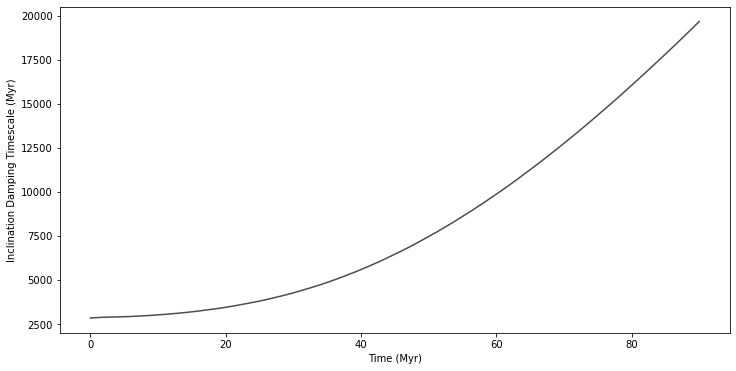

In [41]:
# inclination damping timescale

oTitan = 0.1*np.pi/180.

G = 6.67e-11

k2p = 0.341
M = 5.683e26
Rp = 58232503.3
Omega = 2.*np.pi/(10.656*3600.)
oSat = 26.7*np.pi/180.
Qp = 3081.

m = 0.0000000676319759*1.989e30 
Rm = 0.04421567543 * Rp 
k2m = 0.15 # Titan's tidal Love number
Qm = 100. # tidal Q factor for Titan (estimated)

tau_i_array = [0] * (plotSamples - 1)
for j in range(1, plotSamples):
    i = i_array[j]/180*np.pi
    a = a_array[j]*Rp

    n = np.sqrt(G*M/(a**3))
    a_dot = 3.*k2p/Qp*(m/M)*(Rp/a)**5*n*a

    i_dot = -np.sqrt(1+(m/M))*(3.*k2m*n**5*Rm**5*(np.sin(oTitan))**2/(2.*Qm*G*G*M*m*np.tan(i))+(np.sin(i)*a_dot/(4.*a)*(Omega/(Omega-n))))
    tau_i = -i/i_dot

    tau_i_array[j-1] = tau_i/(365.25*24.*3600.)/1000000.
    
fig3, axes = plt.subplots(1)

fig3.set_size_inches(12, 6)

axes.plot(t_array[1:plotSamples],tau_i_array,color=col)
axes.set_xlabel('Time (Myr)')
axes.set_ylabel('Inclination Damping Timescale (Myr)')

20.98291037675643


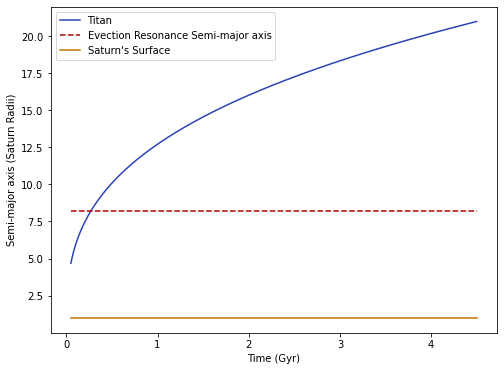

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plot of Titan's migration according to Lainey et al. 2020
AU_TO_M = 1.496e+11 # meters in one AU
a0 = 0.008167696467 / (58232503./AU_TO_M)# current semi-major axis of Titan in Saturn radii
print(a0)
t0 = 4.503 # current age of Saturn (Gyr)
B = 1./3.

time_buff = 0.05

numPts = 1000
DT = (t0-time_buff)/numPts
t_arr = [0]*numPts
a_arr = [0]*numPts
Rs_arr = [1]*numPts
Rres_arr = [8.215]*numPts

for i in range(numPts):
    t = i*DT + time_buff
    t_arr[i] = t
    a_arr[i] = a0*(t/t0)**B
    
fig4, axes4 = plt.subplots(1)

fig4.set_size_inches(8, 6)

axes4.plot(t_arr,a_arr,color='#2b42b2',label="Titan")
axes4.plot(t_arr,Rres_arr,color='#ae0000',linestyle='dashed',label="Evection Resonance Semi-major axis")
axes4.plot(t_arr,Rs_arr,color='#c17200',label="Saturn's Surface")
axes4.set_xlabel('Time (Gyr)')
axes4.set_ylabel('Semi-major axis (Saturn Radii)')
axes4.legend(loc='best', ncol=1)